# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [30]:
data = pd.read_csv('weight-height.csv')
male_df = data.loc[data['Gender'] == 'Male']
female_df = data.loc[data['Gender'] == 'Female']
print("Male Height mean:", male_df.Height.mean())
print("Male Height sd:", male_df.Height.std())
print("Male Weight mean:", male_df.Weight.mean())
print("Male Weight sd:", male_df.Weight.std())
print("Female Height mean:", female_df.Height.mean())
print("Female Height sd:", female_df.Height.std())
print("Female Weight mean:", female_df.Weight.mean())
print("Female Weight sd:", female_df.Weight.std())

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621737
Male Height sd: 2.8633622286606517
Male Weight mean: 187.0206206581929
Male Weight sd: 19.781154516763813
Female Height mean: 63.708773603424916
Female Height sd: 2.696284015765056
Female Weight mean: 135.8600930074687
Female Weight sd: 19.022467805319007


## Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

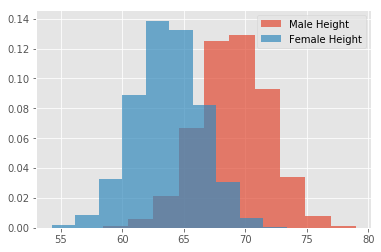

In [103]:
plt.hist(male_df.Height, bins=10, alpha = .7, label='Male Height', density=True)
plt.hist(female_df.Height, bins=10, alpha = .7, color='C1', label = 'Female Height', density=True)
plt.legend()

# Record your observations - are these inline with your personal observations?
Females tend to be shorter, which is aligns with my own personal observations.


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

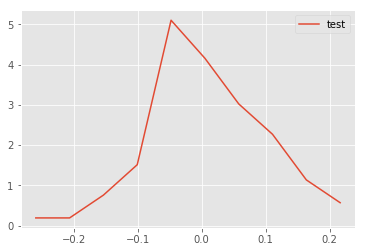

In [94]:
def density(x):
    hist = np.histogram(x, density=True)
    return [0.5*(hist[1][1:]+hist[1][:-1]), hist[0]]
    

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

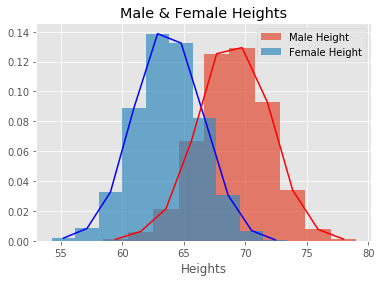

In [102]:
# You code here 
fx, fy = density(female_df.Height)
mx, my = density(male_df.Height)

plt.hist(male_df.Height, bins=10, alpha = .7, label='Male Height', density=True)
plt.hist(female_df.Height, bins=10, alpha = .7, color='C1', label = 'Female Height', density=True)
plt.plot(fx, fy, color = 'b')
plt.plot(mx, my, color = 'r')
plt.title('Male & Female Heights')
plt.xlabel('Heights')
plt.legend()

#### Repeat above exerice for male and female weights

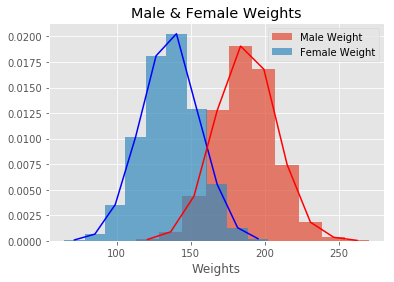

In [99]:
# Your code here 
plt.style.use('ggplot')
fwx, fwy = density(female_df.Weight)
mwx, mwy = density(male_df.Weight)

plt.hist(male_df.Weight, bins=10, alpha = .7, label='Male Weight', density=True)
plt.hist(female_df.Weight, bins=10, alpha = .7, color='C1', label = 'Female Weight', density=True)
plt.plot(fwx, fwy, color = 'b')
plt.plot(mwx, mwy, color = 'r')
plt.title('Male & Female Weights')
plt.xlabel('Weights')
plt.legend()

#### Write your observations in the cell below.

# Record your observations - are these inline with your personal observations?
Women tend to be shorter and weigh less than men. While there is overlap in both areas, there is more overlap in terms of height than in weight.

# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Comparing Heights')

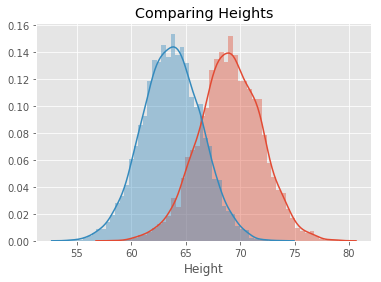

In [114]:
import seaborn as sns
sns.distplot(male_df.Height, color = 'C0')
sns.distplot(female_df.Height, color = 'C1')
plt.title('Comparing Heights')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Comparing Weights')

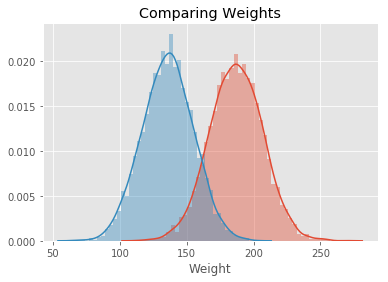

In [115]:
sns.distplot(male_df.Weight, color = 'C0')
sns.distplot(female_df.Weight, color = 'C1')
plt.title('Comparing Weights')

Text(0.5,1,'Comparing weights')

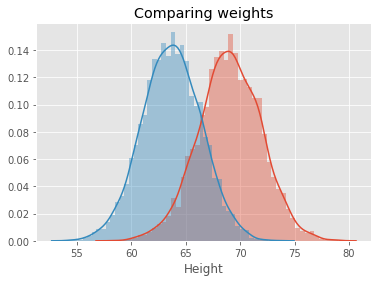

Text(0.5,1,'Comparing Weights')

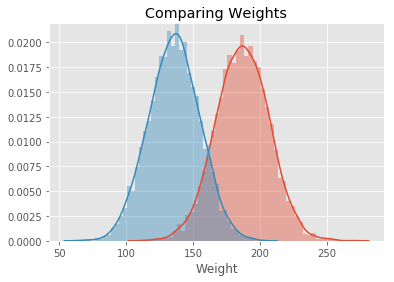

In [117]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?
# sns.distplot is way easier!

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.